In [1]:
%load_ext autoreload
%autoreload 2
import os; import sys;src_dir = os.path.join(os.getcwd(), os.pardir, 'src');sys.path.append(src_dir)

In [3]:
import settings
import data.functions as fn
import pandas as pd
import visualization.visualize as vis
import sqlite3
import matplotlib.pyplot as plt
from data.dal import DAL

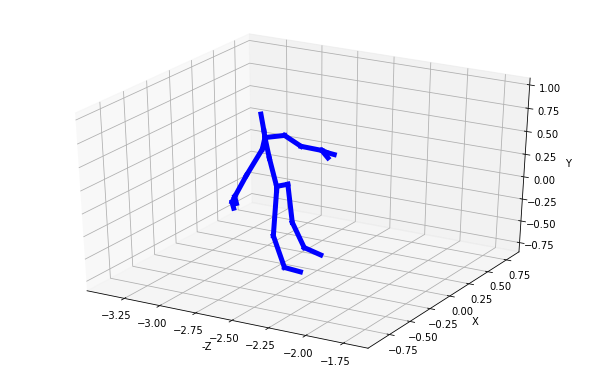

In [8]:
split = DAL("split.hdf")
split.overview()
df = split.get("skeleton_101")
vis.kinect.stickfigureanim(df)

In [16]:
split = DAL("features.hdf")
split.overview()

,df_key,description
0,fourier20,Raw coordinates smoothed to their 20 highest f...
1,fourier5,Raw coordinates smoothed to their 5 highest fo...
2,angles20,angles computed of fourier20
3,angles5,angles computed of fourier5
4,tsfresh5_min,Minimal tsfresh features on angles5
5,tsfresh20_min,Minimal tsfresh features on angles20
6,tsfresh20_all,All tsfresh features on angles20
7,imputed_tsfresh20_all,removed all nans from tsfresh20_all
8,filtered_tsfresh20_all,relevant features of tsfresh20
9,rawconcat,Raw coordinates (all split files concatenated)


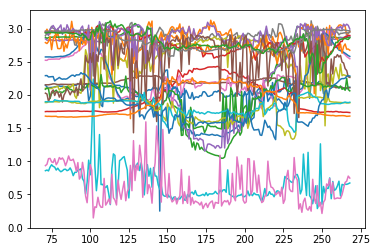

,KneeRight_AnkleRight_FootRight,WristRight_HandRight_HandTipRight,HipRight_KneeRight_AnkleRight,SpineBase_HipLeft_KneeLeft,HipLeft_KneeLeft_AnkleLeft,SpineMid_SpineBase_HipRight,SpineMid_SpineBase_HipLeft,HipRight_SpineBase_HipLeft,SpineShoulder_ShoulderRight_ElbowRight,SpineShoulder_SpineMid_SpineBase,...,Head_Neck_SpineShoulder,Neck_SpineShoulder_SpineMid,Neck_SpineShoulder_ShoulderRight,Neck_SpineShoulder_ShoulderLeft,SpineMid_SpineShoulder_ShoulderRight,SpineMid_SpineShoulder_ShoulderLeft,ShoulderRight_SpineShoulder_ShoulderLeft,SpineBase_HipRight_KneeRight,ShoulderRight_ElbowRight_WristRight,id
71,2.148486,2.944258,2.871209,1.749046,2.846954,1.621643,1.615389,2.153157,2.523721,3.110267,...,2.964004,3.100969,1.886017,1.898566,1.245347,1.231099,2.291718,1.681057,2.937488,0
72,2.120414,2.992398,2.853957,1.751826,2.827030,1.620823,1.616768,2.153423,2.522989,3.110155,...,2.961826,3.100842,1.885922,1.898274,1.245822,1.231036,2.293443,1.676915,2.937044,0
73,2.110667,2.941838,2.867684,1.750591,2.827266,1.621241,1.616435,2.153712,2.539160,3.110268,...,2.962559,3.100815,1.899608,1.898371,1.231471,1.230877,2.271502,1.678363,2.943024,0
74,2.112273,2.921071,2.869253,1.751324,2.825425,1.621769,1.616127,2.157616,2.538430,3.110479,...,2.962717,3.100933,1.897685,1.899277,1.233523,1.230036,2.274382,1.677435,2.943618,0
75,2.112673,2.972160,2.872655,1.750969,2.831556,1.621096,1.615661,2.162000,2.540467,3.110897,...,2.964051,3.101228,1.898966,1.897666,1.232114,1.232032,2.276289,1.676220,2.942888,0
76,2.115777,2.954902,2.874422,1.750594,2.820167,1.619867,1.615654,2.168392,2.540556,3.111106,...,2.962584,3.101264,1.898443,1.897427,1.232687,1.232299,2.277814,1.677330,2.940822,0
77,2.122502,2.971141,2.873157,1.750511,2.822095,1.620045,1.615558,2.167978,2.541371,3.111344,...,2.962116,3.101225,1.898867,1.927955,1.232221,1.199254,2.211799,1.678265,2.938267,0
78,2.127775,2.879583,2.871760,1.750910,2.829404,1.620249,1.615869,2.163223,2.542877,3.111316,...,2.962647,3.101315,1.899271,1.918726,1.231942,1.209256,2.232807,1.678056,2.936967,0
79,2.130748,2.941553,2.872574,1.755186,2.824731,1.613691,1.619756,2.157102,2.541170,3.111241,...,2.963435,3.101132,1.896571,1.915581,1.234723,1.212786,2.246846,1.668244,2.936240,0
80,2.135448,2.817432,2.872429,1.753361,2.816735,1.614278,1.617743,2.157868,2.540256,3.111401,...,2.963436,3.101419,1.894059,1.910618,1.237525,1.218361,2.264835,1.668953,2.936746,0


In [25]:
import matplotlib.pyplot as plt
split = DAL("features.hdf")
split.overview()
#df = split.get("skeleton_101")
#vis.kinect.stickfigureanim(df)
df = split.get("angles_raw")

df = df[df.id == 0]
fig = plt.figure()
#fig.set_size_inches(15,8)
plt.plot(df[[x for x in df.columns if 'id' not in x]])
#plt.legend()
plt.show()
df

In [122]:
with da.DataAccess(settings.database) as db:
    examples = db.get_examples(person="evgeniya",exercise="squat",execution_type=1)
print len(dfs)
dfs = [ex.df for ex in examples]

29


<IPython.core.display.Javascript object>


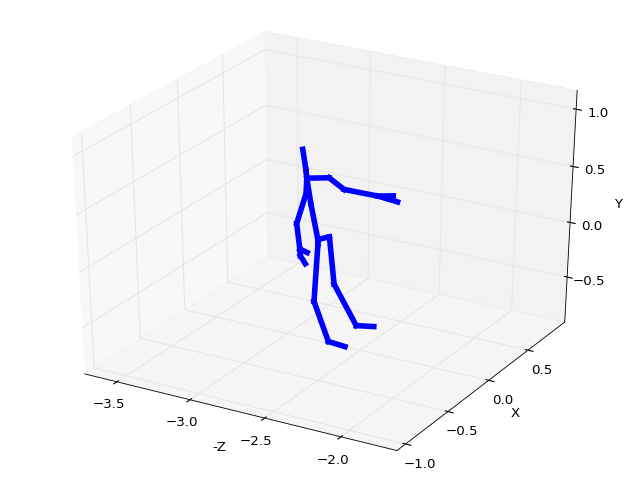

In [123]:
%matplotlib nbagg
figures = "../reports/figures/"
df = dfs[5]
skeleton = list(df.itertuples())[150]
vis.plot_skeleton(skeleton,show=False)
plt.savefig(figures + "kinect-skeleton.png")
plt.show()

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


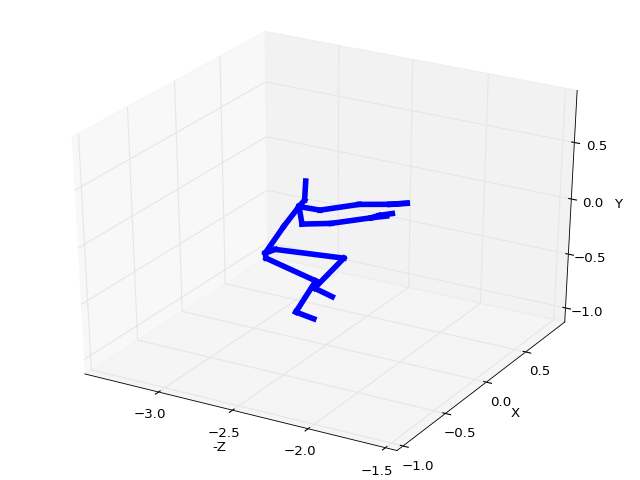

<IPython.core.display.Javascript object>


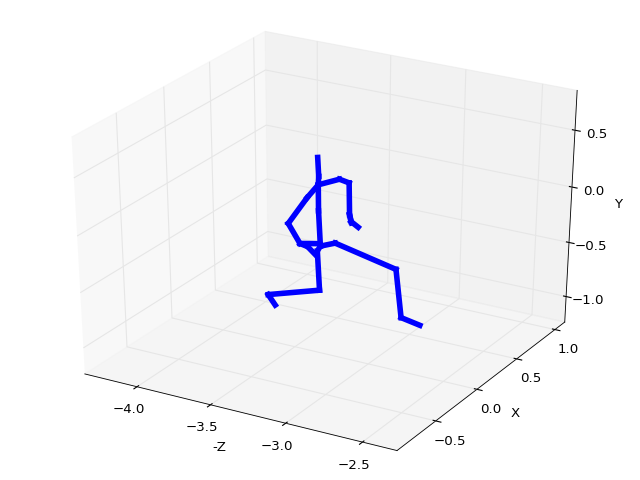

<IPython.core.display.Javascript object>


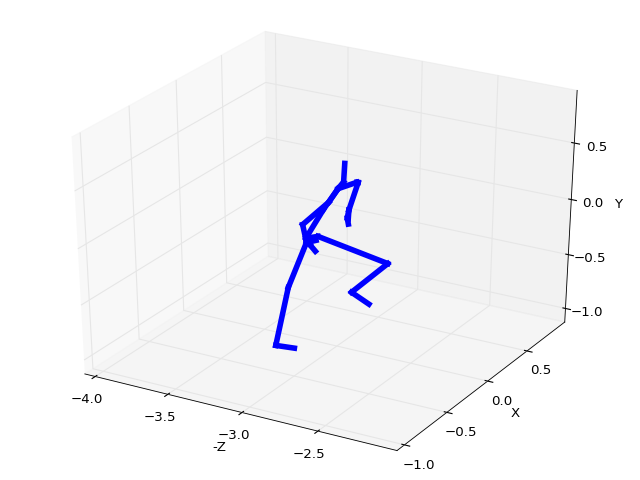

In [117]:
%matplotlib
with da.DataAccess(settings.database) as db:
    squats = db.get_examples(person="evgeniya",exercise="squat",execution_type=1)
    lunges = db.get_examples(person="evgeniya",exercise="lunge",execution_type=1)
    sidelunges = db.get_examples(person="evgeniya",exercise="sidelunge",execution_type=1)
squat = squats[0]
vis.plot_skeleton(list(squat.itertuples())[100],show=False)
plt.savefig(figures + "squat.png")
lunge = lunges[26]
vis.plot_skeleton(list(lunge.itertuples())[49],show=False)
plt.savefig(figures + "lunge.png")
sidelunge = sidelunges[6]
vis.plot_skeleton(list(sidelunge.itertuples())[60],show=False)
plt.savefig(figures + "sidelunge.png")